In [360]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

iris = datasets.load_iris()

In [23]:
iris.data.shape

(150, 4)

### Labels
* Setosa
* Versicolour
* Virginica

### Features
* Sepal Length
* Sepal Width
* Petal Length
* Petal Width

## PT 1 - Select 30 random for test and rest for training.

In [313]:
test_indicies = np.random.choice(150, size = 30, replace = False)
test_indicies
len(set(test_indicies))

# random.randint doesn't work. It is with replacement.

30

In [336]:
idx = np.zeros(iris.data.shape[0])
idx[test_indicies] = 1
len(test_indicies)
X_test = iris.data[idx == 0]
X_train = iris.data[idx == 1]

Y_test = iris.target[idx == 0]
Y_train = iris.target[idx == 1]
print(X_test.shape, X_train.shape)
print(Y_test.shape, Y_train.shape)

(120, 4) (30, 4)
(120,) (30,)


## PT 2 - Scatter plot

In [338]:
train_data

array([[5. , 3.6, 1.4, 0.2],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [5.4, 3.7, 1.5, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.7, 1.5, 0.4],
       [4.8, 3.4, 1.9, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [5.5, 3.5, 1.3, 0.2],
       [4.4, 3.2, 1.3, 0.2],
       [6.9, 3.1, 4.9, 1.5],
       [5.5, 2.3, 4. , 1.3],
       [6.3, 3.3, 4.7, 1.6],
       [5. , 2. , 3.5, 1. ],
       [6.7, 3.1, 4.4, 1.4],
       [5.6, 3. , 4.5, 1.5],
       [6.4, 2.9, 4.3, 1.3],
       [6.8, 2.8, 4.8, 1.4],
       [5.5, 2.4, 3.7, 1. ],
       [6.3, 2.3, 4.4, 1.3],
       [6.2, 2.9, 4.3, 1.3],
       [4.9, 2.5, 4.5, 1.7],
       [7.2, 3.6, 6.1, 2.5],
       [6.9, 3.2, 5.7, 2.3],
       [7.9, 3.8, 6.4, 2. ],
       [6.1, 2.6, 5.6, 1.4],
       [6.3, 3.4, 5.6, 2.4]])

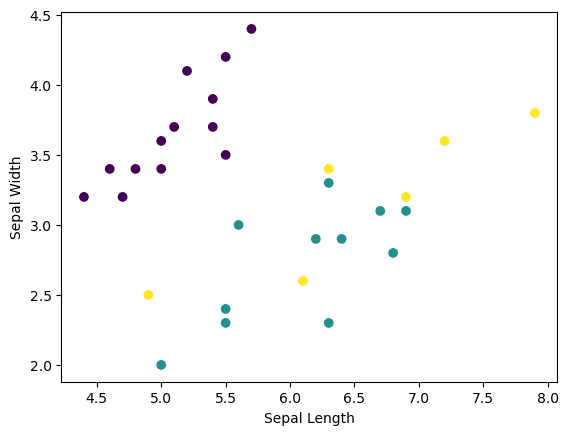

In [358]:
fig, ax = plt.subplots()
scatter = ax.scatter(X_train[:, 0], X_train[:, 1], c=Y_train)
ax.set(xlabel='Sepal Length', ylabel='Sepal Width');

## PT 4 - Decision Tree Classifier Implementataion

In [363]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=9)
dtc.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=9)

In [401]:
pred = dtc.predict(X_test)
acc_train = 100 - (np.sum(pred!=Y_test)/len(pred))* 100
acc_train

# acc_train = 96.6%

96.66666666666667

In [407]:
dtc = DecisionTreeClassifier(random_state=9)
dtc.fit(X_test, Y_test)
pred = dtc.predict(X_train)
acc_test = 100 - (np.sum(pred!=Y_train)/len(pred))* 100
acc_test

# acc_test = 93.3%

93.33333333333333

In [ ]:
# It doesn't really matter.

## PT 4 EXTRA!

In [432]:
# Log Loss = 96.6%

dtc_ll = DecisionTreeClassifier(random_state=9,criterion='log_loss')
dtc_ll.fit(X_train, Y_train)
pred_ll = dtc_ll.predict(X_test)
acc_train_ll = 100 - (np.sum(pred_ll!=Y_test)/len(pred_ll))* 100
acc_train_ll

96.66666666666667

In [434]:
# Entropy = 96.6%

dtc_en = DecisionTreeClassifier(random_state=9,criterion='entropy')
dtc_en.fit(X_train, Y_train)
pred_en = dtc_en.predict(X_test)
acc_train_en = 100 - (np.sum(pred_en!=Y_test)/len(pred_en))* 100
acc_train_en

96.66666666666667

## PT 5 - Random Forest

In [420]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state = 9)
rfc.fit(X_train, Y_train)

rfc_pred = rfc.predict(X_test)
rfc_traing_acc = 100 -((np.sum(rfc_pred!=Y_test)/len(rfc_pred)) * 100)
# rfc_traing_acc = 90.0%

90.0

In [428]:
rfc = RandomForestClassifier(random_state = 9)
rfc.fit(X_test, Y_test)

rfc_pred = rfc.predict(X_train)
rfc_traing_acc = 100 -((np.sum(rfc_pred!=Y_train)/len(rfc_pred)) * 100)
rfc_traing_acc

# rfc_traing_acc = 96.6%
# Very weird.

96.66666666666667